In [19]:
import numpy as np
import pandas as pd
import plotly.express as px

In [20]:
#cargamos los dataframes
salary = pd.read_csv("SALARY.CSV")
stats = pd.read_csv("DATAT2.CSV")

In [21]:
salary

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Salary.1,Salary.2,Salary.3,Salary.4,Salary.5,Unnamed: 9,-additional
0,Rk,Player,Tm,2023-24,2024-25,2025-26,2026-27,2027-28,2028-29,Guaranteed,-9999
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999
2,1,Stephen Curry,GSW,$51915615,$55761216,$59606817,NaN,NaN,NaN,$167283648,curryst01
3,2,Kevin Durant,PHO,$47649433,$51179021,$54708609,NaN,NaN,NaN,$153537063,duranke01
4,3,Nikola Jokić,DEN,$47607350,$51415938,$55224526,$59033114,$62841702,NaN,$213280928,jokicni01
...,...,...,...,...,...,...,...,...,...,...,...
559,558,Matthew Hurt,MEM,NaN,NaN,NaN,NaN,NaN,NaN,$64343,hurtma01
560,559,Pete Nance,CLE,$64343,NaN,NaN,NaN,NaN,NaN,$64343,nancepe01
561,560,Malik Williams,TOR,$77212,NaN,NaN,NaN,NaN,NaN,$77212,willima11
562,561,Kai Jones,LAC,$3175563,$2196970,NaN,NaN,NaN,NaN,$11608,joneska01


In [22]:
salary2 = salary[["Salary", "-additional"]]
salary2

,Salary,-additional
0,2023-24,-9999
1,NaN,-9999
2,$51915615,curryst01
3,$47649433,duranke01
4,$47607350,jokicni01
...,...,...
559,NaN,hurtma01
560,$64343,nancepe01
561,$77212,willima11
562,$3175563,joneska01


In [23]:
salary2.rename(columns = {'-additional':'slugPlayerBREF'})

,Salary,slugPlayerBREF
0,2023-24,-9999
1,NaN,-9999
2,$51915615,curryst01
3,$47649433,duranke01
4,$47607350,jokicni01
...,...,...
559,NaN,hurtma01
560,$64343,nancepe01
561,$77212,willima11
562,$3175563,joneska01


In [24]:
salary2 = salary2.dropna()
salary2

,Salary,-additional
0,2023-24,-9999
2,$51915615,curryst01
3,$47649433,duranke01
4,$47607350,jokicni01
5,$47607350,embiijo01
...,...,...
557,$135120,evbuoto01
560,$64343,nancepe01
561,$77212,willima11
562,$3175563,joneska01


In [25]:
salary2 = salary2.drop([0])
salary2

,Salary,-additional
2,$51915615,curryst01
3,$47649433,duranke01
4,$47607350,jokicni01
5,$47607350,embiijo01
6,$47607350,jamesle01
...,...,...
557,$135120,evbuoto01
560,$64343,nancepe01
561,$77212,willima11
562,$3175563,joneska01


In [26]:
salary2['Salary'] = salary2['Salary'].replace('[\$]', '', regex=True).astype(int)
salary2

,Salary,-additional
2,51915615,curryst01
3,47649433,duranke01
4,47607350,jokicni01
5,47607350,embiijo01
6,47607350,jamesle01
...,...,...
557,135120,evbuoto01
560,64343,nancepe01
561,77212,willima11
562,3175563,joneska01


In [27]:
salary = salary2.rename(columns = {'-additional':'slugPlayerBREF'})
salary

,Salary,slugPlayerBREF
2,51915615,curryst01
3,47649433,duranke01
4,47607350,jokicni01
5,47607350,embiijo01
6,47607350,jamesle01
...,...,...
557,135120,evbuoto01
560,64343,nancepe01
561,77212,willima11
562,3175563,joneska01


In [28]:
stats.columns

Index(['Unnamed: 0', 'slugSeason', 'yearSeason', 'isSeasonCurrent',
       'slugPlayerSeason', 'slugPlayerBREF', 'namePlayer', 'slugPosition',
       'agePlayer', 'slugTeamBREF', 'countGames', 'countGamesStarted', 'pctFG',
       'pctFG3', 'pctFG2', 'pctEFG', 'pctFT', 'isHOFPlayer', 'slugTeamsBREF',
       'idPlayerNBA', 'urlPlayerThumbnail', 'urlPlayerHeadshot',
       'urlPlayerPhoto', 'urlPlayerStats', 'urlPlayerActionPhoto',
       'minutesTotals', 'fgmTotals', 'fgaTotals', 'fg3mTotals', 'fg3aTotals',
       'fg2mTotals', 'fg2aTotals', 'ftmTotals', 'ftaTotals', 'orbTotals',
       'drbTotals', 'trbTotals', 'astTotals', 'stlTotals', 'blkTotals',
       'tovTotals', 'pfTotals', 'ptsTotals', 'countTeamsPlayerSeasonTotals'],
      dtype='object')

In [29]:
SS = pd.merge(salary, stats,how='inner', on='slugPlayerBREF')
SS

,Salary,slugPlayerBREF,Unnamed: 0,slugSeason,yearSeason,isSeasonCurrent,slugPlayerSeason,namePlayer,slugPosition,agePlayer,...,orbTotals,drbTotals,trbTotals,astTotals,stlTotals,blkTotals,tovTotals,pfTotals,ptsTotals,countTeamsPlayerSeasonTotals
0,51915615,curryst01,114,2023-24,2023,False,curryst01_2024,Stephen Curry,PG,35,...,37,293,330,379,54,28,210,117,1956,1
1,47649433,duranke01,138,2023-24,2023,False,duranke01_2024,Kevin Durant,PF,35,...,41,454,495,378,69,91,244,133,2032,1
2,47607350,jokicni01,264,2023-24,2023,False,jokicni01_2024,Nikola Jokic,C,28,...,223,753,976,708,108,68,237,194,2085,1
3,47607350,embiijo01,144,2023-24,2023,False,embiijo01_2024,Joel Embiid,C,29,...,95,335,430,219,46,66,150,112,1353,1
4,47607350,jamesle01,251,2023-24,2023,False,jamesle01_2024,LeBron James,PF,39,...,61,457,518,589,89,38,245,78,1822,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,135120,evbuoto01,146,2023-24,2023,False,evbuoto01_2024,Tosan Evbuomwan,SF,22,...,18,42,60,16,6,5,9,23,101,1
523,77212,willima11,556,2023-24,2023,False,willima11_2024,Malik Williams,C,25,...,15,23,38,2,3,4,3,15,19,1
524,77212,willima11,556,2023-24,2023,False,willima11_2024,Malik Williams,C,25,...,15,23,38,2,3,4,3,15,19,1
525,64343,mooreta02,357,2023-24,2023,False,mooreta02_2024,Taze Moore,SG,25,...,4,4,8,5,2,0,3,4,18,1


In [30]:
SS = SS.dropna(subset=['Salary'])
SS

,Salary,slugPlayerBREF,Unnamed: 0,slugSeason,yearSeason,isSeasonCurrent,slugPlayerSeason,namePlayer,slugPosition,agePlayer,...,orbTotals,drbTotals,trbTotals,astTotals,stlTotals,blkTotals,tovTotals,pfTotals,ptsTotals,countTeamsPlayerSeasonTotals
0,51915615,curryst01,114,2023-24,2023,False,curryst01_2024,Stephen Curry,PG,35,...,37,293,330,379,54,28,210,117,1956,1
1,47649433,duranke01,138,2023-24,2023,False,duranke01_2024,Kevin Durant,PF,35,...,41,454,495,378,69,91,244,133,2032,1
2,47607350,jokicni01,264,2023-24,2023,False,jokicni01_2024,Nikola Jokic,C,28,...,223,753,976,708,108,68,237,194,2085,1
3,47607350,embiijo01,144,2023-24,2023,False,embiijo01_2024,Joel Embiid,C,29,...,95,335,430,219,46,66,150,112,1353,1
4,47607350,jamesle01,251,2023-24,2023,False,jamesle01_2024,LeBron James,PF,39,...,61,457,518,589,89,38,245,78,1822,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,135120,evbuoto01,146,2023-24,2023,False,evbuoto01_2024,Tosan Evbuomwan,SF,22,...,18,42,60,16,6,5,9,23,101,1
523,77212,willima11,556,2023-24,2023,False,willima11_2024,Malik Williams,C,25,...,15,23,38,2,3,4,3,15,19,1
524,77212,willima11,556,2023-24,2023,False,willima11_2024,Malik Williams,C,25,...,15,23,38,2,3,4,3,15,19,1
525,64343,mooreta02,357,2023-24,2023,False,mooreta02_2024,Taze Moore,SG,25,...,4,4,8,5,2,0,3,4,18,1


In [31]:
SS.columns

Index(['Salary', 'slugPlayerBREF', 'Unnamed: 0', 'slugSeason', 'yearSeason',
       'isSeasonCurrent', 'slugPlayerSeason', 'namePlayer', 'slugPosition',
       'agePlayer', 'slugTeamBREF', 'countGames', 'countGamesStarted', 'pctFG',
       'pctFG3', 'pctFG2', 'pctEFG', 'pctFT', 'isHOFPlayer', 'slugTeamsBREF',
       'idPlayerNBA', 'urlPlayerThumbnail', 'urlPlayerHeadshot',
       'urlPlayerPhoto', 'urlPlayerStats', 'urlPlayerActionPhoto',
       'minutesTotals', 'fgmTotals', 'fgaTotals', 'fg3mTotals', 'fg3aTotals',
       'fg2mTotals', 'fg2aTotals', 'ftmTotals', 'ftaTotals', 'orbTotals',
       'drbTotals', 'trbTotals', 'astTotals', 'stlTotals', 'blkTotals',
       'tovTotals', 'pfTotals', 'ptsTotals', 'countTeamsPlayerSeasonTotals'],
      dtype='object')

In [32]:
SS = SS[['namePlayer','Salary', 'slugPlayerBREF', 'slugPosition',
       'agePlayer', 'slugTeamBREF', 'countGames', 'countGamesStarted', 'pctFG',
       'pctFG3', 'pctFG2', 'pctEFG', 'pctFT', 'isHOFPlayer', 'slugTeamsBREF',
       'idPlayerNBA', 'minutesTotals', 'fgmTotals', 'fgaTotals', 'fg3mTotals', 'fg3aTotals',
       'fg2mTotals', 'fg2aTotals', 'ftmTotals', 'ftaTotals', 'orbTotals',
       'drbTotals', 'trbTotals', 'astTotals', 'stlTotals', 'blkTotals',
       'tovTotals', 'pfTotals', 'ptsTotals']]
SS

,namePlayer,Salary,slugPlayerBREF,slugPosition,agePlayer,slugTeamBREF,countGames,countGamesStarted,pctFG,pctFG3,...,ftaTotals,orbTotals,drbTotals,trbTotals,astTotals,stlTotals,blkTotals,tovTotals,pfTotals,ptsTotals
0,Stephen Curry,51915615,curryst01,PG,35,GSW,74,74,0.450,0.408,...,324,37,293,330,379,54,28,210,117,1956
1,Kevin Durant,47649433,duranke01,PF,35,PHO,75,75,0.523,0.413,...,423,41,454,495,378,69,91,244,133,2032
2,Nikola Jokic,47607350,jokicni01,C,28,DEN,79,79,0.583,0.359,...,438,223,753,976,708,108,68,237,194,2085
3,Joel Embiid,47607350,embiijo01,C,29,PHI,39,39,0.529,0.388,...,452,95,335,430,219,46,66,150,112,1353
4,LeBron James,47607350,jamesle01,PF,39,LAL,71,71,0.540,0.410,...,404,61,457,518,589,89,38,245,78,1822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Tosan Evbuomwan,135120,evbuoto01,SF,22,TOT,17,8,0.507,0.375,...,25,18,42,60,16,6,5,9,23,101
523,Malik Williams,77212,willima11,C,25,TOR,7,2,0.265,0.200,...,2,15,23,38,2,3,4,3,15,19
524,Malik Williams,77212,willima11,C,25,TOR,7,2,0.265,0.200,...,2,15,23,38,2,3,4,3,15,19
525,Taze Moore,64343,mooreta02,SG,25,POR,4,0,0.421,0.143,...,2,4,4,8,5,2,0,3,4,18


In [33]:
SS.describe()

,Salary,agePlayer,countGames,countGamesStarted,pctFG,pctFG3,pctFG2,pctEFG,pctFT,idPlayerNBA,...,ftaTotals,orbTotals,drbTotals,trbTotals,astTotals,stlTotals,blkTotals,tovTotals,pfTotals,ptsTotals
count,5.270000e+02,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,5.200000e+02,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,9.464072e+06,26.425047,50.924099,23.770398,0.458829,0.303374,0.527556,0.526636,0.686239,1.292253e+06,...,102.984820,50.155598,157.151803,207.307400,126.506641,35.631879,24.415560,61.108159,89.273245,541.432638
std,1.107296e+07,4.694627,22.787369,27.260510,0.093238,0.126507,0.107902,0.090113,0.239207,6.090631e+05,...,119.845384,51.331311,138.951888,182.996947,135.422573,27.912022,29.203885,56.835244,61.437759,505.016875
min,6.434300e+04,19.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.544000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.019706e+06,23.000000,34.000000,1.000000,0.416000,0.277000,0.487000,0.492500,0.667000,1.626164e+06,...,22.500000,15.000000,53.000000,71.500000,28.000000,11.000000,6.000000,16.000000,39.000000,144.000000
50%,4.698000e+06,26.000000,55.000000,10.000000,0.453000,0.346000,0.537000,0.534000,0.759000,1.629601e+06,...,59.000000,36.000000,126.000000,167.000000,81.000000,32.000000,16.000000,46.000000,81.000000,376.000000
75%,1.207301e+07,30.000000,70.000000,46.500000,0.500000,0.382500,0.581000,0.576500,0.826000,1.630568e+06,...,138.000000,67.000000,225.500000,282.500000,176.000000,53.000000,35.000000,91.000000,137.000000,841.000000
max,5.191562e+07,39.000000,84.000000,82.000000,0.747000,0.750000,0.800000,0.747000,0.944000,1.642013e+06,...,782.000000,335.000000,826.000000,1120.000000,752.000000,150.000000,254.000000,282.000000,254.000000,2370.000000


In [36]:
SS.drop_duplicates()
SS

,namePlayer,Salary,slugPlayerBREF,slugPosition,agePlayer,slugTeamBREF,countGames,countGamesStarted,pctFG,pctFG3,...,ftaTotals,orbTotals,drbTotals,trbTotals,astTotals,stlTotals,blkTotals,tovTotals,pfTotals,ptsTotals
0,Stephen Curry,51915615,curryst01,PG,35,GSW,74,74,0.450,0.408,...,324,37,293,330,379,54,28,210,117,1956
1,Kevin Durant,47649433,duranke01,PF,35,PHO,75,75,0.523,0.413,...,423,41,454,495,378,69,91,244,133,2032
2,Nikola Jokic,47607350,jokicni01,C,28,DEN,79,79,0.583,0.359,...,438,223,753,976,708,108,68,237,194,2085
3,Joel Embiid,47607350,embiijo01,C,29,PHI,39,39,0.529,0.388,...,452,95,335,430,219,46,66,150,112,1353
4,LeBron James,47607350,jamesle01,PF,39,LAL,71,71,0.540,0.410,...,404,61,457,518,589,89,38,245,78,1822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Tosan Evbuomwan,135120,evbuoto01,SF,22,TOT,17,8,0.507,0.375,...,25,18,42,60,16,6,5,9,23,101
523,Malik Williams,77212,willima11,C,25,TOR,7,2,0.265,0.200,...,2,15,23,38,2,3,4,3,15,19
524,Malik Williams,77212,willima11,C,25,TOR,7,2,0.265,0.200,...,2,15,23,38,2,3,4,3,15,19
525,Taze Moore,64343,mooreta02,SG,25,POR,4,0,0.421,0.143,...,2,4,4,8,5,2,0,3,4,18


In [51]:
SS = SS.drop_duplicates(subset='namePlayer')
SS

,namePlayer,Salary,slugPlayerBREF,slugPosition,agePlayer,slugTeamBREF,countGames,countGamesStarted,pctFG,pctFG3,...,ftaTotals,orbTotals,drbTotals,trbTotals,astTotals,stlTotals,blkTotals,tovTotals,pfTotals,ptsTotals
0,Stephen Curry,51915615,curryst01,PG,35,GSW,74,74,0.450,0.408,...,324,37,293,330,379,54,28,210,117,1956
1,Kevin Durant,47649433,duranke01,PF,35,PHO,75,75,0.523,0.413,...,423,41,454,495,378,69,91,244,133,2032
2,Nikola Jokic,47607350,jokicni01,C,28,DEN,79,79,0.583,0.359,...,438,223,753,976,708,108,68,237,194,2085
3,Joel Embiid,47607350,embiijo01,C,29,PHI,39,39,0.529,0.388,...,452,95,335,430,219,46,66,150,112,1353
4,LeBron James,47607350,jamesle01,PF,39,LAL,71,71,0.540,0.410,...,404,61,457,518,589,89,38,245,78,1822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,Ashton Hagans,103550,haganas01,PG,24,POR,19,1,0.408,0.320,...,17,14,31,45,54,11,9,30,40,80
521,Tosan Evbuomwan,135120,evbuoto01,SF,22,TOT,17,8,0.507,0.375,...,25,18,42,60,16,6,5,9,23,101
523,Malik Williams,77212,willima11,C,25,TOR,7,2,0.265,0.200,...,2,15,23,38,2,3,4,3,15,19
525,Taze Moore,64343,mooreta02,SG,25,POR,4,0,0.421,0.143,...,2,4,4,8,5,2,0,3,4,18


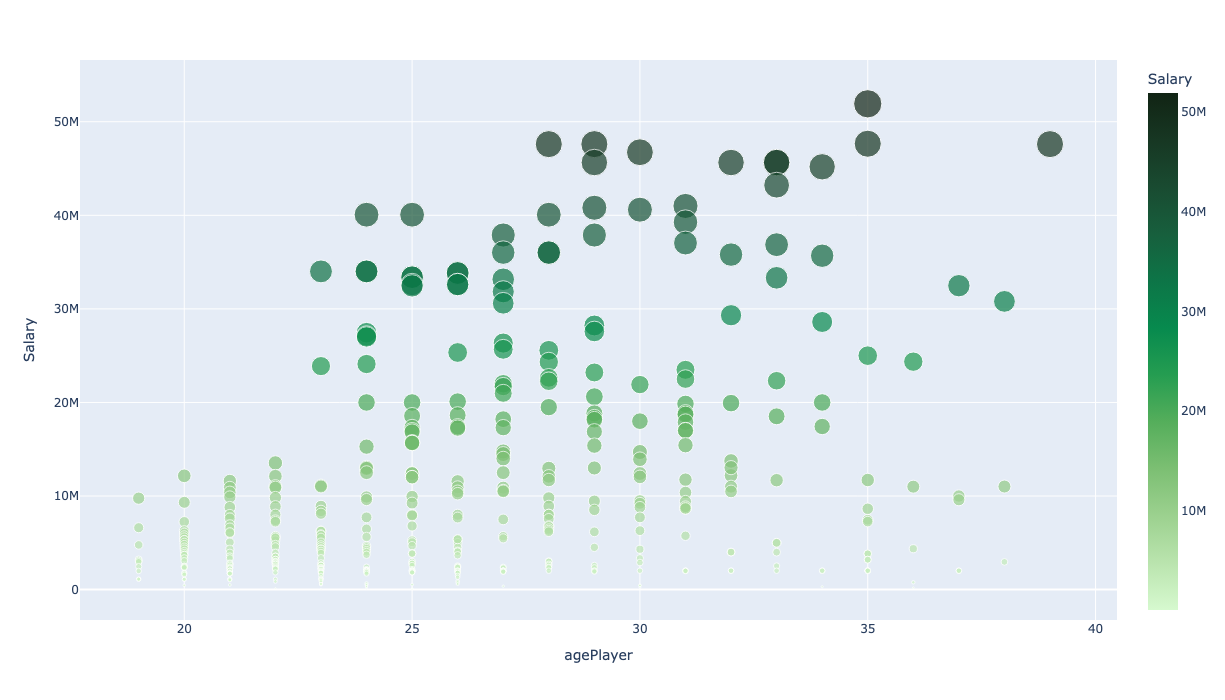

In [61]:
fig = px.scatter(SS, x="agePlayer", y="Salary", color = "Salary",
                 size='Salary', hover_data=['namePlayer','slugTeamBREF'], color_continuous_scale=px.colors.sequential.algae, height=700)
fig.show()

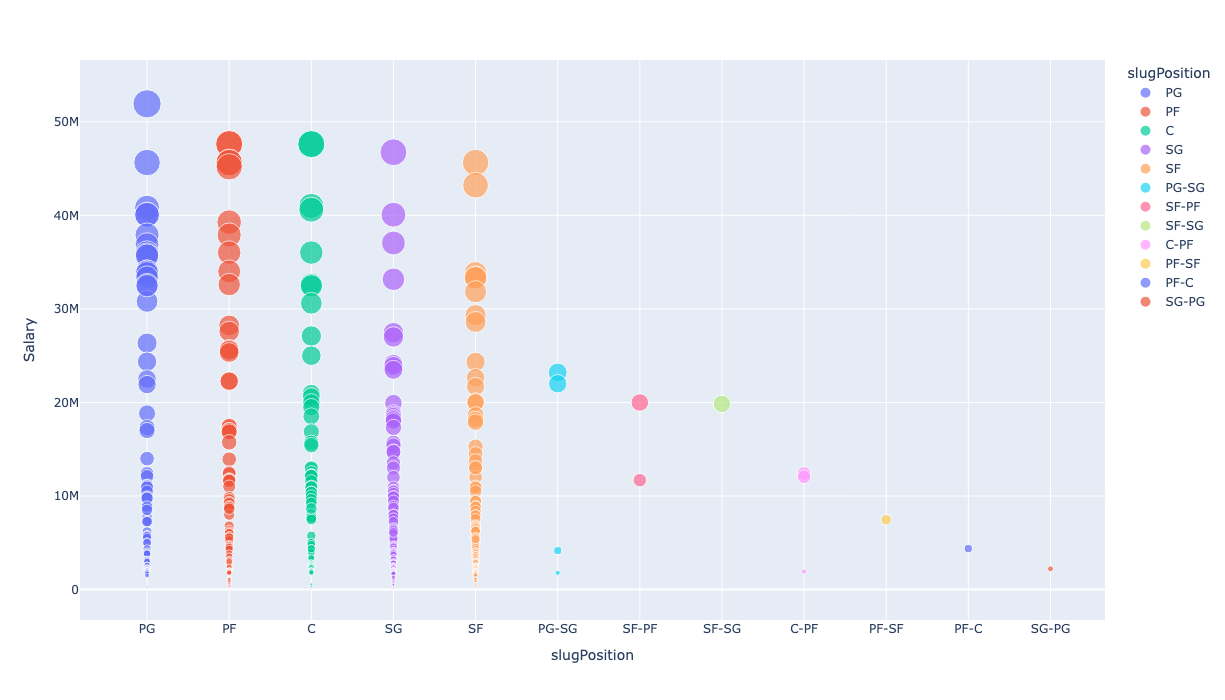

In [66]:
fig = px.scatter(SS, x="slugPosition", y="Salary", color = "slugPosition",
                 size='Salary', hover_data=['namePlayer','slugTeamBREF'], height=700)
fig.show()

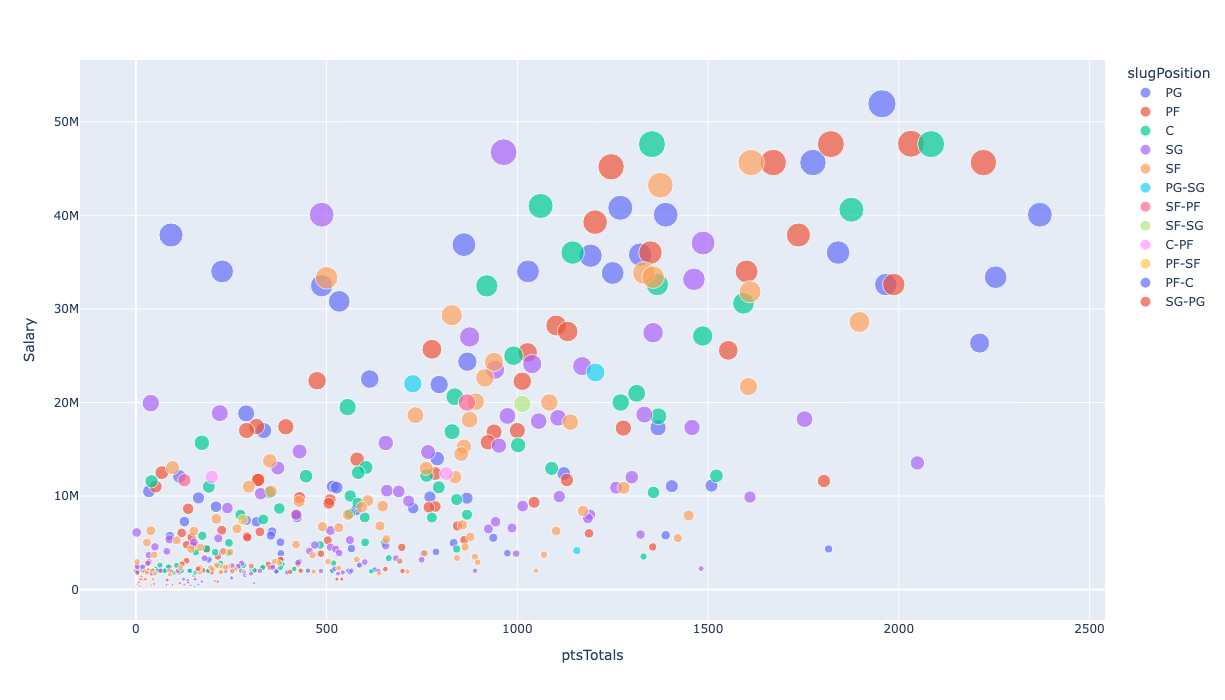

In [67]:
fig = px.scatter(SS, x="ptsTotals", y="Salary", color = "slugPosition",
                 size='Salary', hover_data=['namePlayer','slugTeamBREF'], height=700)
fig.show()